# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge( study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
unique_mice_count = merged_data["Mouse ID"].nunique()
unique_mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"],)]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
print(duplicate_mice)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep="first")
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice_count = cleaned_data["Mouse ID"].nunique()
cleaned_unique_mice_count

249

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = cleaned_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Variance_Tumor_Volume=("Tumor Volume (mm3)", "var"),
    StdDev_Tumor_Volume=("Tumor Volume (mm3)", "std"),
    SEM_Tumor_Volume=("Tumor Volume (mm3)", "sem")
).reset_index()

summary_statistics


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,StdDev_Tumor_Volume,SEM_Tumor_Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics2 = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

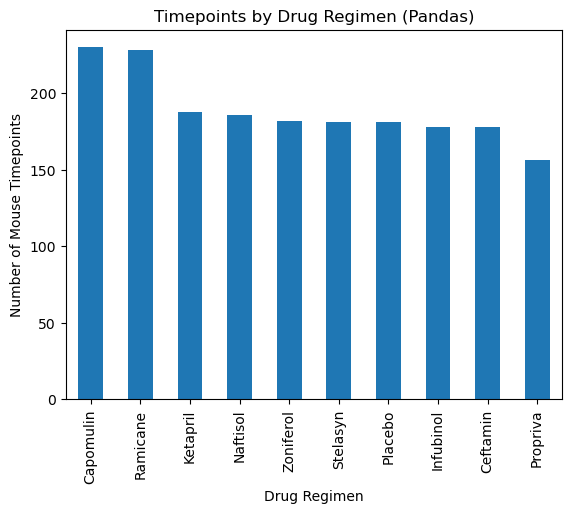

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_by_drug_pandas = cleaned_data["Drug Regimen"].value_counts()
timepoints_by_drug_pandas.plot(kind="bar", title="Timepoints by Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.show()

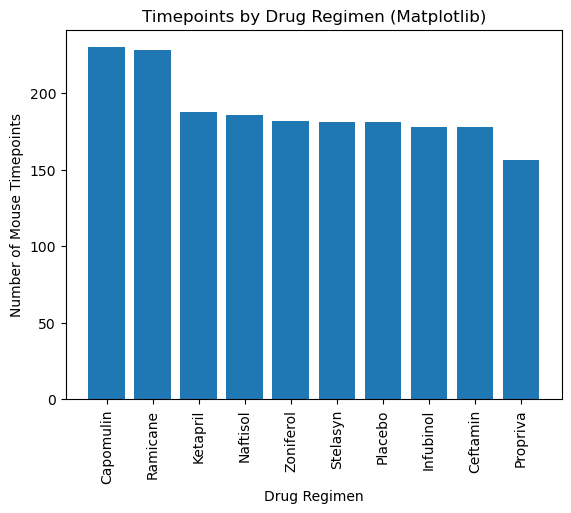

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_by_drug_matplotlib = cleaned_data["Drug Regimen"].value_counts()
plt.bar(timepoints_by_drug_matplotlib.index, timepoints_by_drug_matplotlib.values)
plt.title("Timepoints by Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


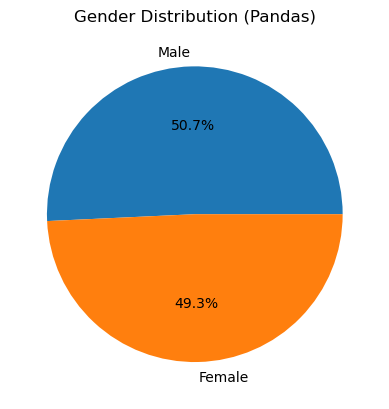

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution_pandas = cleaned_data["Sex"].value_counts()
gender_distribution_pandas.plot(kind="pie", autopct='%1.1f%%', title="Gender Distribution (Pandas)")
plt.ylabel("")
plt.show()

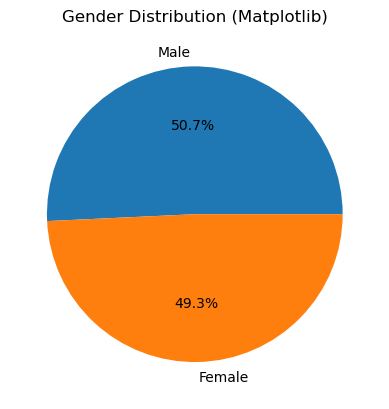

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution_matplotlib = cleaned_data["Sex"].value_counts()
plt.pie(gender_distribution_matplotlib.values, labels=gender_distribution_matplotlib.index, autopct='%1.1f%%')
plt.title("Gender Distribution (Matplotlib)")
plt.show()


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
# List of treatment groups
treatment_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to hold tumor volume data
tumor_volume_data = []

# Loop through each treatment group to calculate IQR and find outliers
for treatment in treatment_groups:
    group_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quartiles = group_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
    
    
    tumor_volume_data.append(group_data)
    


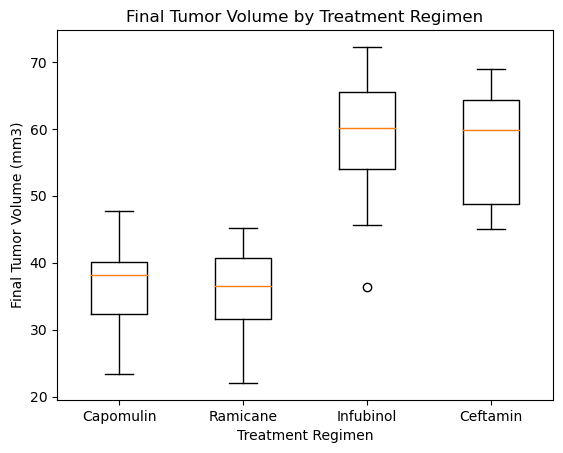

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatment_groups)
plt.title("Final Tumor Volume by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

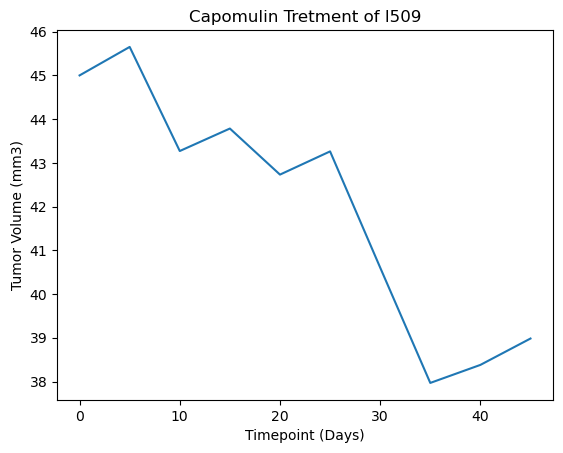

In [31]:

# Create Line Plot and Scatter Plot for Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"]=="Capomulin"]
mouse_id = capomulin_data.iloc[0]["Mouse ID"]
one_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
plt.plot(one_mouse_data["Timepoint"], one_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Tretment of l509")
plt.show()

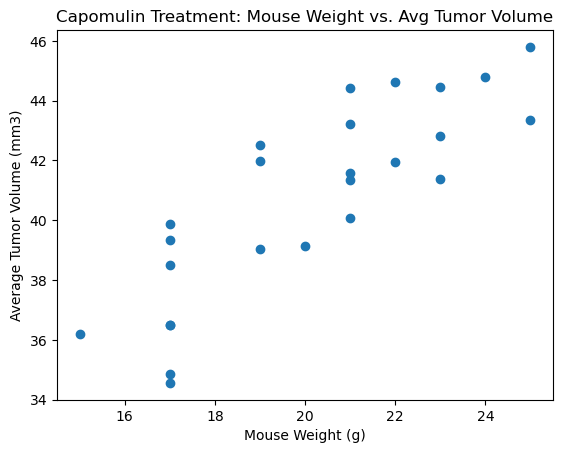

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_group = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_group.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_group.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.title("Capomulin Treatment: Mouse Weight vs. Avg Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

'y=0.95x +21.55'

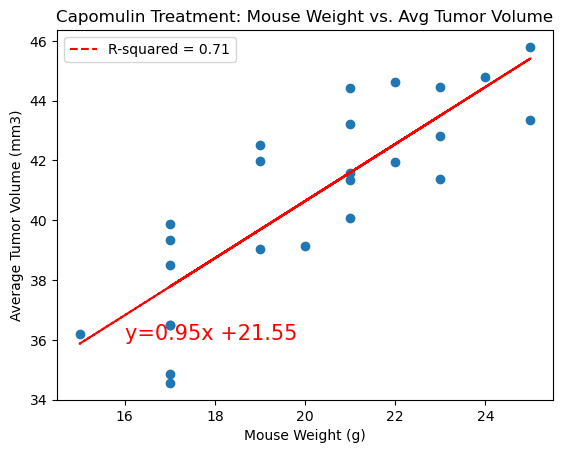

In [34]:
plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.title("Capomulin Treatment: Mouse Weight vs. Avg Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(16,36 ),fontsize = 15,color="red")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', linestyle='dashed', label=f"R-squared = {r_value**2:.2f}")
plt.legend()
plt.show()